Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

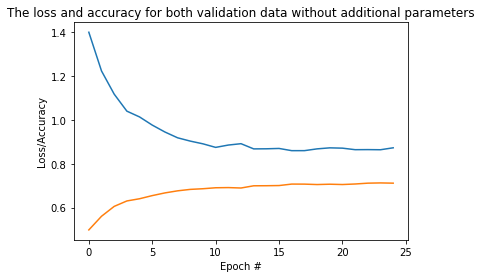

In [4]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from matplotlib import pyplot as plt

K.common.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy without additional paramteres: %.2f%%" % (scores[1]*100))

#Saving this model
model.save("oldmodel.h5")

import numpy as np
plt.plot(np.arange(0, 25), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 25), history.history["val_accuracy"], label="validation accuracy")
plt.title("The loss and accuracy for both validation data without additional parameters")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)       

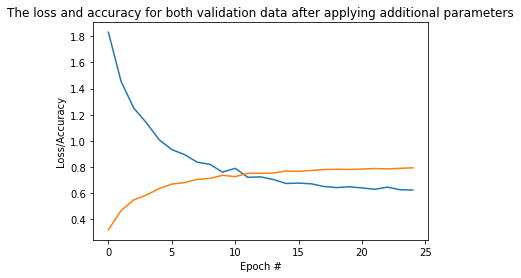

In [5]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from matplotlib import pyplot as plt

K.common.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3),  padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy with additional parameters: %.2f%%" % (scores[1]*100))
#Saving this model
model.save("newmodel.h5")

import numpy as np
plt.plot(np.arange(0, 25), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 25), history.history["val_accuracy"], label="validation accuracy")
plt.title("The loss and accuracy for both validation data after applying additional parameters")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

In [10]:
# Loading the models and comparing the perfromances with and without additional parameters
# old model withot additional parameters
from keras.models import load_model
model_to_load = "oldmodel.h5"
model = load_model(model_to_load)
# Evaluate is an inbuilt keyword for validating the model
loss1, accuracy1 = model.evaluate(X_test, y_test)

# new model with additional parameters
model_to_load = "newmodel.h5"
model = load_model(model_to_load)
loss2, accuracy2 = model.evaluate(X_test, y_test)

print("Accuracy without additional parameters:  %.2f%%" %(accuracy1))
print("Accuracy with additional parameters: %.2f%%" %(accuracy2))

print("Change in Accuracy: %.2f%%" %(accuracy2 - accuracy1))

print("Loss without additional parameters: %.2f%%" %(loss1))
print("Loss with additional parameters: %.2f%%" %(loss2))

print("Change in Loss: %.2f%%" %(loss2 - loss1))

10000/10000 [==============================] - 2s 247us/step
Accuracy without additional parameters:  0.71%
Accuracy with additional parameters: 0.79%
Change in Accuracy: 0.08%
Loss without additional parameters: 0.87%
Loss with additional parameters: 0.62%
Change in Loss: -0.25%


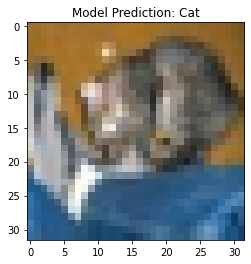

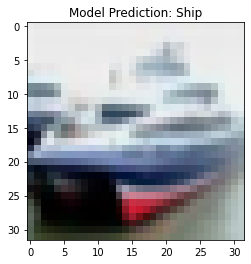

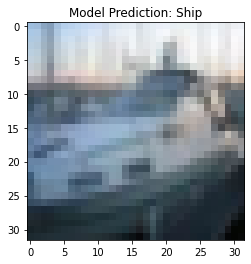

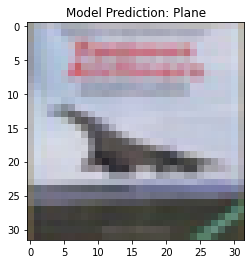

In [14]:
import numpy
from keras.datasets import cifar10
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt

K.common.set_image_dim_ordering('th')
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

test_images = X_test
test_labels = y_test

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


num_to_text = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

model_to_load = "oldmodel.h5"
model = load_model(model_to_load)

def make_prediction(i):
    test_img = test_images[i]
    test_data= X_test[[i], :]

    plt.imshow(test_img, cmap=plt.get_cmap('gray'))
    plt.title("Model Prediction: {}".format(num_to_text[model.predict_classes(test_data)[0]]))
    plt.show()

prediction_idx = [0,1, 2, 3]

for idx in prediction_idx:
    make_prediction(idx)
